In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score , precision_score, f1_score , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
magic_data = pd.read_csv('magic04.data', header=None)
magic_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
column_names = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'
]
magic_data.columns = column_names
magic_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
X = magic_data.drop('class', axis=1)
y = magic_data['class']

In [5]:
X_g = X[y == 'g']
y_g = y[y == 'g']
X_h = X[y == 'h']
y_h = y[y == 'h']

In [6]:
n_samples_h = len(X_h)

In [7]:
rus = RandomUnderSampler(sampling_strategy={
    'g': n_samples_h,  # Undersample 'g' class to match 'h' class
    'h': n_samples_h   # Keep all samples of 'h' class
}, random_state=42)

In [8]:
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f"Original dataset shape: {X.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")
print(f"Original class distribution: {y.value_counts()}")
print(f"Resampled class distribution: {y_resampled.value_counts()}")

Original dataset shape: (19020, 10)
Resampled dataset shape: (13376, 10)
Original class distribution: class
g    12332
h     6688
Name: count, dtype: int64
Resampled class distribution: class
g    6688
h    6688
Name: count, dtype: int64


In [9]:
X_resampled_g = X_resampled[y_resampled == 'g']
y_resampled_g = y_resampled[y_resampled == 'g']

X_resampled_h = X_resampled[y_resampled == 'h']
y_resampled_h = y_resampled[y_resampled == 'h']

In [10]:
X_train_val_g, X_test_g, y_train_val_g, y_test_g = train_test_split(X_resampled_g, y_resampled_g, test_size=0.3, random_state=75)
X_train_g, X_val_g, y_train_g, y_val_g = train_test_split(X_train_val_g, y_train_val_g, test_size=0.5, random_state=75)

In [11]:
scaler_g = StandardScaler()
X_train_scaled_g = scaler_g.fit_transform(X_train_g)
X_val_scaled_g = scaler_g.transform(X_val_g)
X_test_scaled_g = scaler_g.transform(X_test_g)

In [12]:
X_train_val_h, X_test_h, y_train_val_h, y_test_h = train_test_split(X_resampled_h, y_resampled_h, test_size=0.3, random_state=75)
X_train_h, X_val_h, y_train_h, y_val_h = train_test_split(X_train_val_h, y_train_val_h, test_size=0.5, random_state=75)

In [13]:
scaler_h = StandardScaler()
X_train_scaled_h = scaler_h.fit_transform(X_train_h)
X_val_scaled_h = scaler_h.transform(X_val_h)
X_test_scaled_h = scaler_h.transform(X_test_h)

In [14]:
X_train_scaled = np.concatenate((X_train_scaled_g, X_train_scaled_h), axis=0)
X_val_scaled = np.concatenate((X_val_scaled_g, X_val_scaled_h), axis=0)
X_test_scaled = np.concatenate((X_test_scaled_g, X_test_scaled_h), axis=0)

y_train = np.concatenate((y_train_g, y_train_h), axis=0)
y_val = np.concatenate((y_val_g, y_val_h), axis=0)
y_test = np.concatenate((y_test_g, y_test_h), axis=0)


In [15]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'metric': ['euclidean', 'manhattan'],
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val_scaled, y_val)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

best_k = best_params['n_neighbors']

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best cross-validation score: 0.8751


In [16]:
best_k

5

In [17]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [18]:
best_knn = KNeighborsClassifier(n_neighbors=best_k,metric=best_params['metric'])
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

In [19]:
y_test_pred = best_knn.predict(X_test_scaled)

In [20]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8719481813652217
Precision: 0.8720205896557589
Recall: 0.8719481813652217
F1-score: 0.8719419502151643


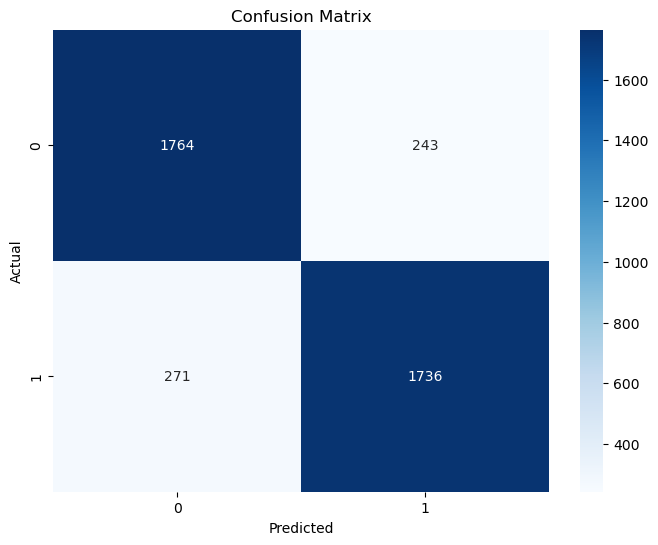

In [21]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()